
1. Age Distribution Analysis:
   - Compare the age distribution of Medicare beneficiaries with the age distribution in the MIMIC-IV dataset.
   - Analyze how different age groups utilize hospital resources (e.g., length of stay, ICU admissions) in MIMIC-IV.

2. Gender-based Analysis:
   - Compare the gender distribution of Medicare beneficiaries with MIMIC-IV patients.
   - Investigate if there are gender-specific patterns in hospital admissions, diagnoses, or outcomes.

3. Race and Ethnicity Insights:
   - Analyze how the racial/ethnic distribution in Medicare enrollment compares to the MIMIC-IV patient population.
   - Investigate potential disparities in healthcare utilization or outcomes across different racial/ethnic groups.

4. Disability and ESRD Analysis:
   - Examine how the proportion of disabled beneficiaries or those with End-Stage Renal Disease (ESRD) in Medicare compares to the prevalence of these conditions in MIMIC-IV.
   - Analyze the hospital utilization patterns and outcomes for these specific patient groups.

5. Dual Eligibility Impact:
   - Investigate how dual eligibility (Medicare-Medicaid) status correlates with hospital admissions, length of stay, or readmission rates in MIMIC-IV.

6. Geographic Variation:
   - If MIMIC-IV data includes geographic information, compare hospital utilization patterns across different states or counties with Medicare enrollment patterns.

7. Insurance Type Analysis:
   - Compare outcomes and resource utilization between patients with Original Medicare vs. Medicare Advantage in MIMIC-IV.

8. Prescription Drug Coverage Impact:
   - Analyze how prescription drug coverage (Part D) might influence medication-related issues or outcomes in MIMIC-IV data.

9. Low Income Subsidy (LIS) Analysis:
   - Investigate if patients likely to qualify for LIS have different hospital utilization patterns or outcomes in MIMIC-IV.

10. Temporal Trends:
    - Analyze how changes in Medicare enrollment over time (if multiple years of data are available) correlate with trends in hospital admissions or patient demographics in MIMIC-IV.

11. Comorbidity Analysis:
    - Investigate how the presence of multiple chronic conditions (as indicated by enrollment in various Medicare parts) correlates with hospital outcomes in MIMIC-IV.

12. Resource Utilization by Coverage Type:
    - Analyze differences in resource utilization (e.g., ICU admissions, length of stay) between patients with different types of Medicare coverage in MIMIC-IV.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing.utils import Utils
from preprocessing.preprocessor import Preprocessor
from config import FILE_PATHS

# initialize the preprocessor classs
preprocessor = Preprocessor(file_paths=FILE_PATHS)

In [4]:
FILE_PATHS

{'edstays': '../ED/edstays.csv',
 'diagnosis': '../ED/diagnosis.csv',
 'triage': '../ED/triage.csv',
 'vitalsigns': '../ED/vitalsign.csv',
 'admissions': '../HOSP/admissions.csv',
 'transfers': '../HOSP/transfers.csv',
 'patients': '../HOSP/patients.csv',
 'hosp_diagnosis': '../HOSP/diagnoses_icd.csv',
 'icu_stays': '../ICU/icustays.csv',
 'icd10_codes': '../Data/diagnosis_icd10_codes.csv',
 'icd9_codes': '../Data/diagnosis_icd9_codes.csv'}

In [5]:
!ls ../Data

Medicare_Monthly_Enrollment_Data_Sept2024.csv
diagnosis_icd10_codes.csv
diagnosis_icd9_codes.csv
disease_incidence_final_table.pkl
ed_diagnosis_df.pkl
icd9.RTF


In [6]:
# import the insurance data
insurance_df = pd.read_csv("../Data/Medicare_Monthly_Enrollment_Data_Sept2024.csv")

In [7]:
Utils.print_info(insurance_df)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 497018, Columns: 54

Column Types:
  object: 53
  int64: 1

Missing Values:
  No missing values

Numeric Columns Summary:
                YEAR
count  497018.000000
mean     2018.242333
std         3.315021
min      2013.000000
25%      2015.000000
50%      2018.000000
75%      2021.000000
max      2024.000000

Categorical Columns Summary:
  MONTH:
    Unique values: 13
    Top 5 values: {'January': 40029, 'February': 40029, 'March': 40029, 'April': 40029, 'May': 40029}
  BENE_GEO_LVL:
    Unique values: 3
    Top 5 values: {'County': 488227, 'State': 8642, 'National': 149}
  BENE_STATE_ABRVTN:
    Unique values: 59
    Top 5 values: {'TX': 38144, 'GA': 23989, 'VA': 20115, 'KY': 18178, 'MO': 17433}
  BENE_STATE_DESC:
    Unique values: 59
    Top 5 values: {'Texas': 38144, 'Georgia': 23989, 'Virginia': 20115, 'Kentucky': 18178, 'Missouri': 17433}
  BENE_COUNTY_DESC:
    Unique values: 1976
    Top 5 values: {'Total': 8642, 'U

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,862992.0,652965.0,210026.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323.0,6484.0,2840.0,...,8742.0,5902.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033.0,28775.0,12258.0,...,38651.0,26393.0,12258.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847.0,5036.0,810.0,...,5515.0,4704.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0


In [8]:
import pandas as pd
import numpy as np

def preprocess_insurance_df(insurance_df):
    """
    Preprocess the insurance DataFrame by converting data types, handling missing values,
    and performing feature engineering.

    Parameters:
    insurance_df (pd.DataFrame): The raw insurance data.

    Returns:
    pd.DataFrame: The preprocessed insurance data.
    """
    # 1. Convert Categorical Columns
    categorical_columns = [
        'BENE_GEO_LVL',
        'BENE_STATE_ABRVTN',
        'BENE_STATE_DESC',
        'BENE_COUNTY_DESC'
    ]
    
    for col in categorical_columns:
        if col in insurance_df.columns:
            insurance_df[col] = insurance_df[col].astype('category')
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    
    # 2. Handle Missing Values
    # Example: Fill numerical NaNs with 0 and categorical NaNs with 'Unknown'
    numeric_columns = insurance_df.select_dtypes(include=['int64', 'float64']).columns
    insurance_df[numeric_columns] = insurance_df[numeric_columns].fillna(0)
    
    for col in categorical_columns:
        if 'Unknown' not in insurance_df[col].cat.categories:
            insurance_df[col] = insurance_df[col].cat.add_categories(['Unknown'])
        insurance_df[col] = insurance_df[col].fillna('Unknown')
    
    # 3. Convert Columns to Numeric
    # Ensure that beneficiary counts and other numeric metrics are properly formatted
    beneficiary_columns = [col for col in insurance_df.columns if 'BENES' in col]
    
    for col in beneficiary_columns:
        insurance_df[col] = pd.to_numeric(insurance_df[col], errors='coerce').fillna(0)
    
    # 4. Feature Engineering
    # Example: Calculate total beneficiaries by summing all beneficiary-related columns
    insurance_df['TOTAL_BENEFICIARIES'] = insurance_df[beneficiary_columns].sum(axis=1)
    
    # Optional: Create additional features as needed
    # For example, calculating the percentage of each beneficiary type
    for col in beneficiary_columns:
        percentage_col = f"{col}_PCT"
        insurance_df[percentage_col] = (
            insurance_df[col] / insurance_df['TOTAL_BENEFICIARIES'] * 100
        ).replace([np.inf, -np.inf], 0)
    
    return insurance_df

# Apply preprocessing to the insurance data
preprocessed_insurance_df = preprocess_insurance_df(insurance_df)

# Display the first few rows of the preprocessed data
preprocessed_insurance_df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES_PCT,B_ORGNL_MDCR_BENES_PCT,B_MA_AND_OTH_BENES_PCT,PRSCRPTN_DRUG_TOT_BENES_PCT,PRSCRPTN_DRUG_PDP_BENES_PCT,PRSCRPTN_DRUG_MAPD_BENES_PCT,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES_PCT,PRSCRPTN_DRUG_FULL_LIS_BENES_PCT,PRSCRPTN_DRUG_PARTIAL_LIS_BENES_PCT,PRSCRPTN_DRUG_NO_LIS_BENES_PCT
0,2013,Year,National,US,National,Total,,52425659.0,37613096.0,14812563.0,...,5.768753,3.987065,1.781688,4.291703,2.725810,1.565894,1.202943,0.123906,0.049221,2.915633
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,5.847765,4.424590,1.423168,4.318082,2.966254,1.351829,1.392472,0.222190,0.077600,2.625827
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323.0,6484.0,2840.0,...,5.911110,3.990777,1.920333,4.081384,2.209736,1.870973,1.243483,0.200147,0.070998,2.566755
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033.0,28775.0,12258.0,...,5.930451,4.049633,1.880817,4.196778,2.392526,1.804253,0.809528,0.133029,0.058152,3.196070
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847.0,5036.0,810.0,...,5.833325,4.975514,0.856753,4.410691,3.606824,0.802809,1.885914,0.321547,0.077214,2.124959


In [9]:
# filter for Massachusetts
massachusetts_df = insurance_df[insurance_df['BENE_STATE_DESC'] == 'Massachusetts']

# further filter for Suffolk County
suffolk_df = massachusetts_df[massachusetts_df['BENE_COUNTY_DESC'] == 'Suffolk County']

suffolk_df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES_PCT,B_ORGNL_MDCR_BENES_PCT,B_MA_AND_OTH_BENES_PCT,PRSCRPTN_DRUG_TOT_BENES_PCT,PRSCRPTN_DRUG_PDP_BENES_PCT,PRSCRPTN_DRUG_MAPD_BENES_PCT,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES_PCT,PRSCRPTN_DRUG_FULL_LIS_BENES_PCT,PRSCRPTN_DRUG_PARTIAL_LIS_BENES_PCT,PRSCRPTN_DRUG_NO_LIS_BENES_PCT
1273,2013,Year,County,MA,Massachusetts,Suffolk County,25025,96914.0,81999.0,14914.0,...,5.564784,4.608062,0.956722,4.345382,3.409192,0.936126,2.702382,0.081358,0.048763,1.512880
4608,2013,January,County,MA,Massachusetts,Suffolk County,25025,95608.0,81363.0,14245.0,...,5.567345,4.641048,0.926297,4.344877,3.440171,0.904706,2.655846,0.088578,0.052549,1.547905
7943,2013,February,County,MA,Massachusetts,Suffolk County,25025,95724.0,81411.0,14313.0,...,5.565119,4.635521,0.929599,4.346052,3.437761,0.908291,2.664590,0.087828,0.052099,1.541536
11278,2013,March,County,MA,Massachusetts,Suffolk County,25025,95973.0,81600.0,14373.0,...,5.564164,4.632882,0.931281,4.339261,3.429041,0.910220,2.674801,0.086058,0.050741,1.527661
14613,2013,April,County,MA,Massachusetts,Suffolk County,25025,96181.0,81691.0,14490.0,...,5.562496,4.625703,0.936792,4.344110,3.428267,0.915843,2.682609,0.083929,0.048818,1.528754


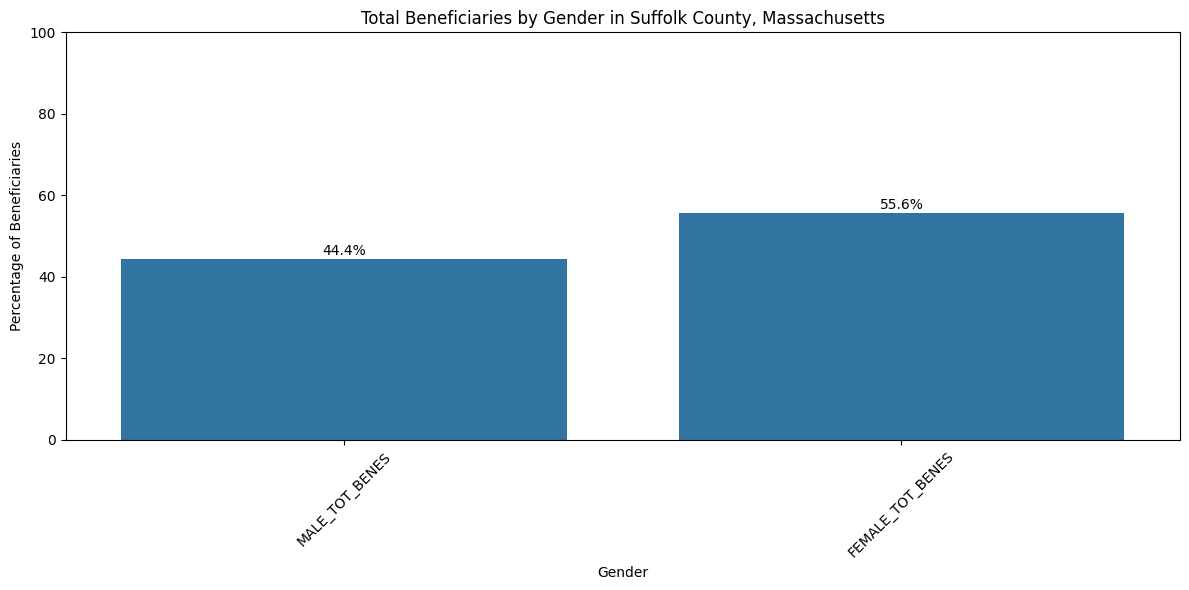

In [10]:
# Visualize the gender distribution for Suffolk County
gender_columns = ['MALE_TOT_BENES', 'FEMALE_TOT_BENES']
gender_totals_suffolk = suffolk_df[gender_columns].apply(pd.to_numeric, errors='coerce').sum()
gender_percentage_suffolk = gender_totals_suffolk / gender_totals_suffolk.sum() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_percentage_suffolk.index, y=gender_percentage_suffolk.values, legend=False)
plt.title('Total Beneficiaries by Gender in Suffolk County, Massachusetts')
plt.xlabel('Gender')
plt.ylabel('Percentage of Beneficiaries')
plt.ylim(0, 100)
plt.xticks(rotation=45)
for index, value in enumerate(gender_percentage_suffolk):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.tight_layout()
plt.show()

### Age Distribution of Beneficiaries

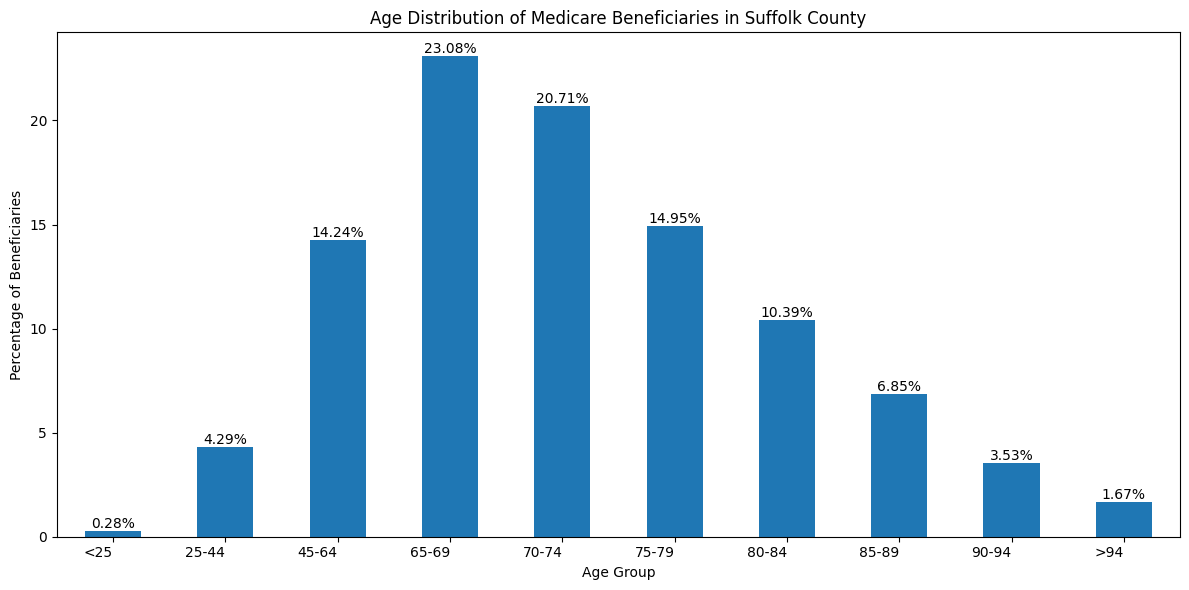

In [11]:
# Age Distribution Analysis
age_columns = [
    'AGE_LT_25_BENES', 'AGE_25_TO_44_BENES', 'AGE_45_TO_64_BENES',
    'AGE_65_TO_69_BENES', 'AGE_70_TO_74_BENES', 'AGE_75_TO_79_BENES',
    'AGE_80_TO_84_BENES', 'AGE_85_TO_89_BENES', 'AGE_90_TO_94_BENES',
    'AGE_GT_94_BENES'
]

age_distribution = suffolk_df[age_columns].sum()
total_beneficiaries = age_distribution.sum()
age_percentages = (age_distribution / total_beneficiaries * 100).round(2)

# Friendly labels for visualization
age_labels = [
    '<25', '25-44', '45-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '>94'
]

plt.figure(figsize=(12, 6))
age_percentages.index = age_labels  # Rename xtick labels
age_percentages.plot(kind='bar')
plt.title('Age Distribution of Medicare Beneficiaries in Suffolk County')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Beneficiaries')
plt.xticks(rotation=0, ha='right')
for i, v in enumerate(age_percentages):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')
    plt.tight_layout()

plt.show()

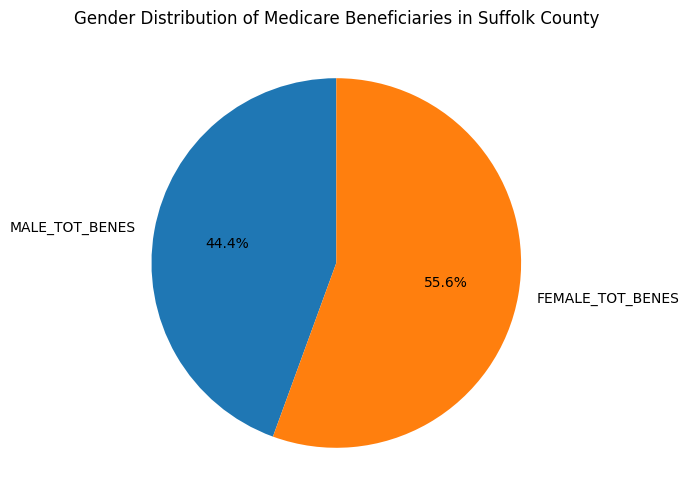

In [12]:
# gender based analysis
gender_columns = ['MALE_TOT_BENES', 'FEMALE_TOT_BENES']
gender_distribution = suffolk_df[gender_columns].sum()
gender_percentages = (gender_distribution / gender_distribution.sum() * 100).round(2)
plt.figure(figsize=(8, 6))
gender_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Medicare Beneficiaries in Suffolk County')
plt.ylabel('')
plt.show()

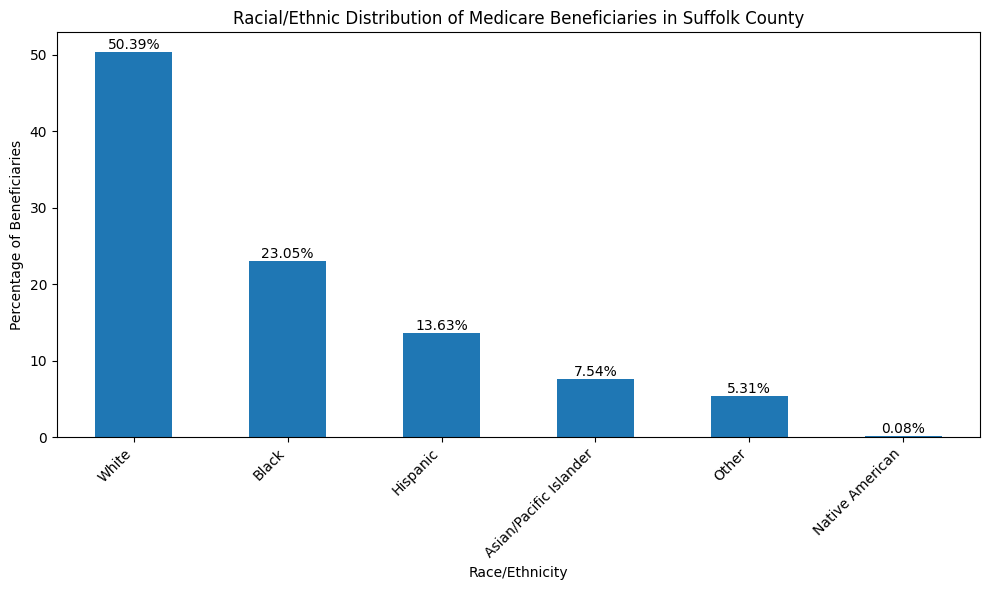

In [13]:
# race and ethnicity insights
race_columns = ['WHITE_TOT_BENES', 'BLACK_TOT_BENES', 'API_TOT_BENES',
                'HSPNC_TOT_BENES', 'NATIND_TOT_BENES', 'OTHR_TOT_BENES']
race_distribution = suffolk_df[race_columns].sum()
race_percentages = (race_distribution / race_distribution.sum() * 100).round(2)

# Friendly labels for visualization
race_labels = ['White', 'Black', 'Asian/Pacific Islander', 'Hispanic', 'Native American', 'Other']

race_percentages.index = race_labels  # Rename xtick labels
race_percentages = race_percentages.sort_values(ascending=False)  # Order in descending

plt.figure(figsize=(10, 6))
race_percentages.plot(kind='bar')
plt.title('Racial/Ethnic Distribution of Medicare Beneficiaries in Suffolk County')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Beneficiaries')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(race_percentages):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


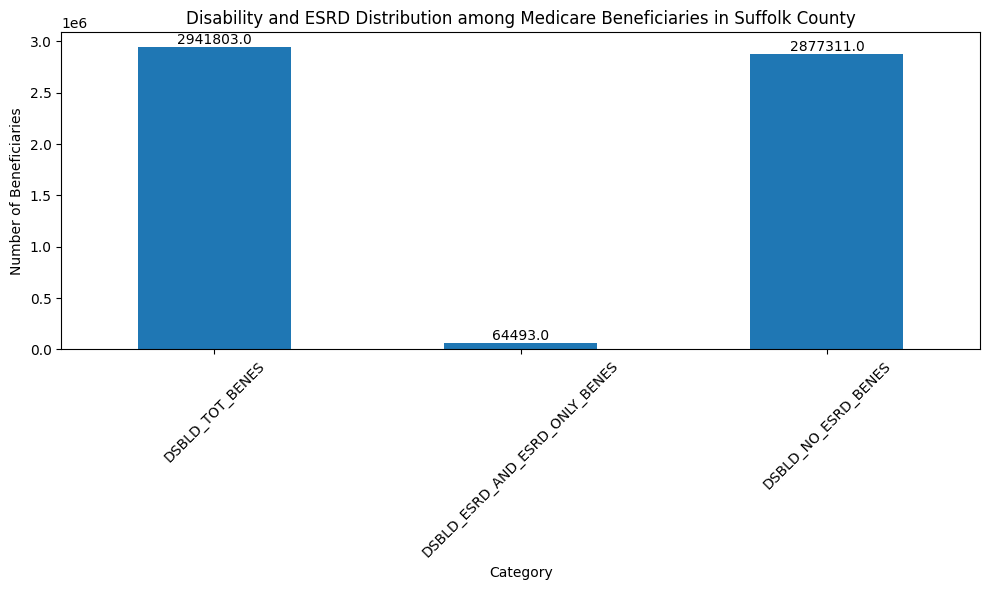

In [14]:
# disability and ESRD analysis

disability_columns = ['DSBLD_TOT_BENES', 'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES']
disability_distribution = suffolk_df[disability_columns].sum()
plt.figure(figsize=(10, 6))
disability_distribution.plot(kind='bar')
plt.title('Disability and ESRD Distribution among Medicare Beneficiaries in Suffolk County')
plt.xlabel('Category')
plt.ylabel('Number of Beneficiaries')
plt.xticks(rotation=45)
for i, v in enumerate(disability_distribution):
    plt.text(i, v, f'{v}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

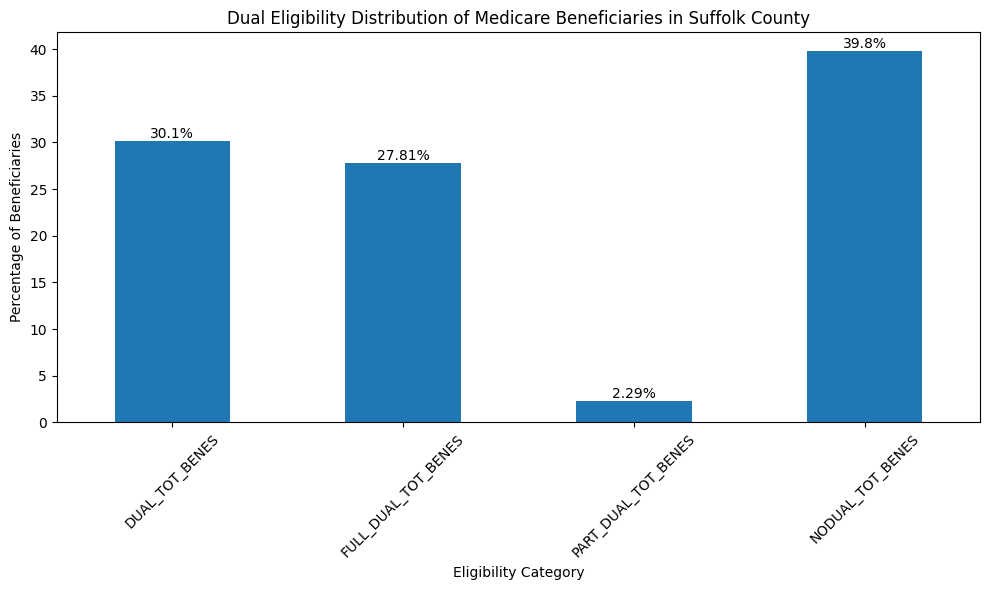

In [15]:
# Dual Eligibility Analysis
dual_columns = ['DUAL_TOT_BENES', 'FULL_DUAL_TOT_BENES', 'PART_DUAL_TOT_BENES', 'NODUAL_TOT_BENES']
dual_distribution = suffolk_df[dual_columns].sum()
dual_percentages = (dual_distribution / dual_distribution.sum() * 100).round(2)
plt.figure(figsize=(10, 6))
dual_percentages.plot(kind='bar')
plt.title('Dual Eligibility Distribution of Medicare Beneficiaries in Suffolk County')
plt.xlabel('Eligibility Category')
plt.ylabel('Percentage of Beneficiaries')
plt.xticks(rotation=45)
for i, v in enumerate(dual_percentages):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Demographic Comparison Between MEdicare Beneficiaries and MIMIC Patients

Objective: Compare the demographic distributions (age, gender, race/ethinicity) of Medicare Beneficiaries in the insuarnce data with those of patients in the MIMIC Dataset

In [17]:
# using patients table in MIMIC to obtain age, gender, and ethnicity information
patients_df = preprocessor.preprocess_table('patients')

patients_df.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,is_dead
0,10000032,F,52,2180,2014 - 2016,2180-09-09,True
1,10000048,F,23,2126,2008 - 2010,NaT,False
2,10000058,F,33,2168,2020 - 2022,NaT,False
3,10000068,F,19,2160,2008 - 2010,NaT,False
4,10000084,M,72,2160,2017 - 2019,2161-02-13,True


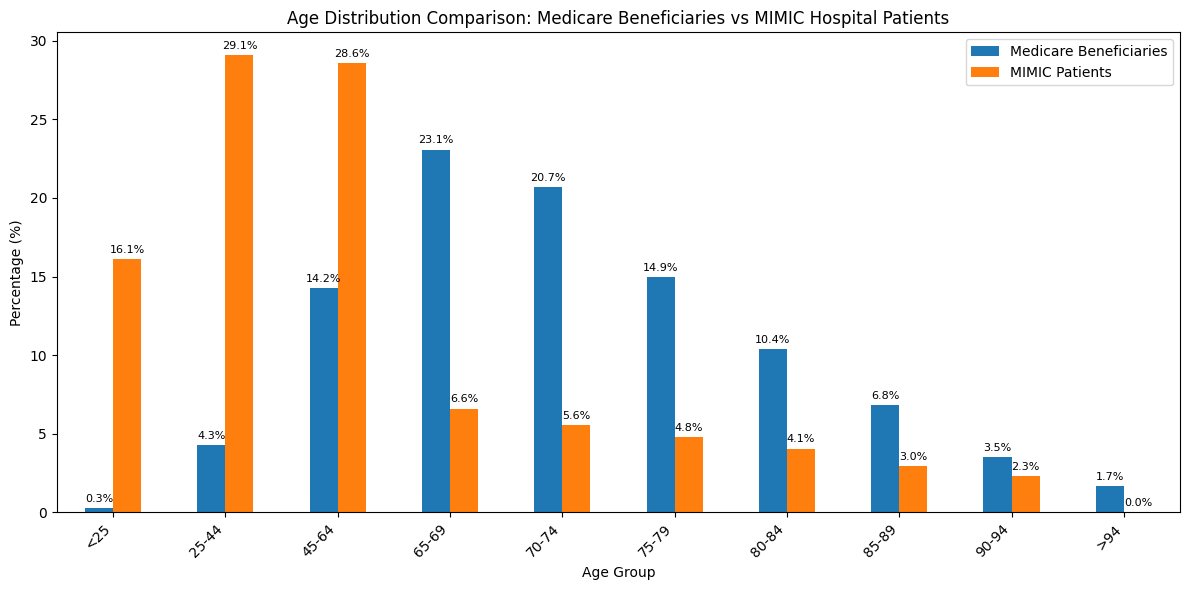

In [25]:
# Combine the Age Distributions and Plot Side by Side
age_columns = [
    'AGE_LT_25_BENES', 'AGE_25_TO_44_BENES', 'AGE_45_TO_64_BENES',
    'AGE_65_TO_69_BENES', 'AGE_70_TO_74_BENES', 'AGE_75_TO_79_BENES',
    'AGE_80_TO_84_BENES', 'AGE_85_TO_89_BENES', 'AGE_90_TO_94_BENES',
    'AGE_GT_94_BENES'
]
age_labels = [
    '<25', '25-44', '45-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '>94'
]

age_distribution_insurance = suffolk_df[age_columns].sum()
total_beneficiaries = age_distribution_insurance.sum()
age_percentages_insurance = (age_distribution_insurance / total_beneficiaries * 100).round(2)
age_percentages_insurance.index = age_labels  # Ensure index labels match

# **For MIMIC Patients (from `patients_df`):**
bins = [0, 25, 45, 65, 70, 75, 80, 85, 90, 95, 150]
labels = [
    '<25', '25-44', '45-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '>94'
]
patients_df['age_group'] = pd.cut(patients_df['anchor_age'], bins=bins, labels=labels, right=False)

age_distribution_patients = patients_df['age_group'].value_counts().sort_index()
total_patients = age_distribution_patients.sum()
age_percentages_patients = (age_distribution_patients / total_patients * 100).round(2)
age_percentages_patients.index = labels  # Ensure index labels match

# **Combine the two Series into a DataFrame:**
age_comparison_df = pd.DataFrame({
    'Medicare Beneficiaries': age_percentages_insurance,
    'MIMIC Patients': age_percentages_patients
})

# **Plotting the combined age distributions:**
plt.figure(figsize=(12, 6))
age_comparison_df.plot(kind='bar', ax=plt.gca())
plt.title('Age Distribution Comparison: Medicare Beneficiaries vs MIMIC Hospital Patients')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Annotate percentage values on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# lets see if we isolate for medicare patients in MIMIC

admissions_df = preprocessor.preprocess_table('admissions')

admissions_patients = admissions_df.merge(patients_df, on='subject_id', how='inner')


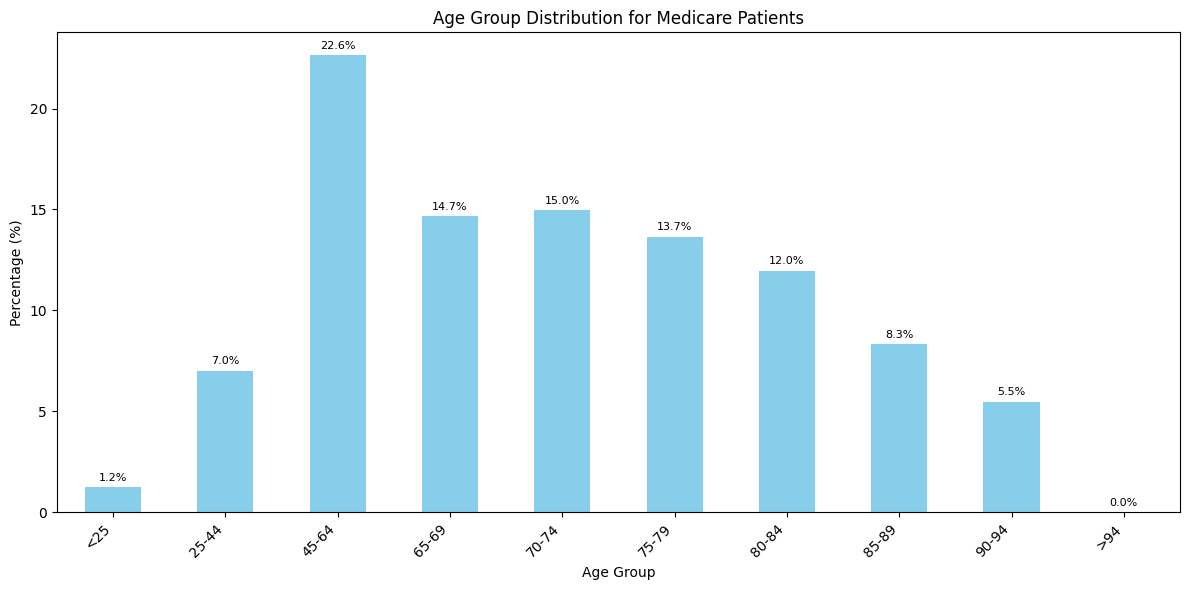

In [34]:
admissions_medicare = admissions_patients[admissions_patients['insurance'] == 'Medicare']

# Create age distribution for Medicare patients
age_distribution_medicare = admissions_medicare['age_group'].value_counts().sort_index()
total_medicare = age_distribution_medicare.sum()
age_percentages_medicare = (age_distribution_medicare / total_medicare * 100).round(2)
age_percentages_medicare.index = labels  # Ensure index labels match

# Plot the age distribution
plt.figure(figsize=(12, 6))
age_percentages_medicare.plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Age Group Distribution for Medicare Patients')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Annotate percentage values on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=8)

plt.tight_layout()
plt.show()

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_38399/3922702208.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admissions_medicare['age_group'] = pd.cut(admissions_medicare['anchor_age'], bins=bins, labels=labels, right=False)


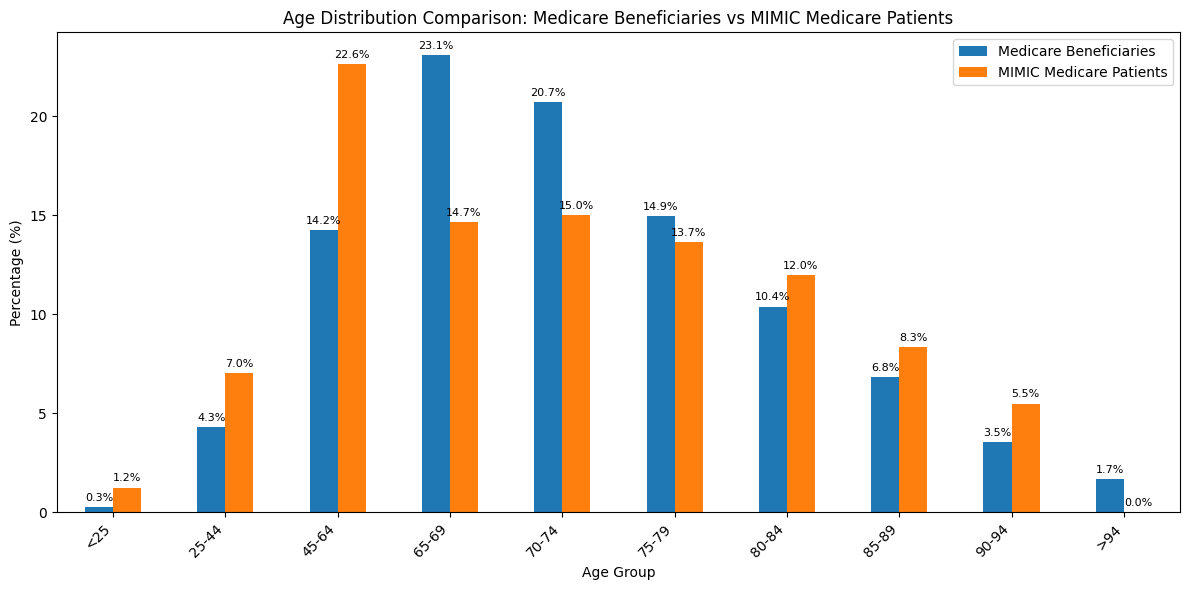

In [36]:
# Combine the Age Distributions of Medicare Beneficiaries and Medicare Patients in MIMIC

# **For Medicare Beneficiaries (from `suffolk_df`):**
age_columns = [
    'AGE_LT_25_BENES', 'AGE_25_TO_44_BENES', 'AGE_45_TO_64_BENES',
    'AGE_65_TO_69_BENES', 'AGE_70_TO_74_BENES', 'AGE_75_TO_79_BENES',
    'AGE_80_TO_84_BENES', 'AGE_85_TO_89_BENES', 'AGE_90_TO_94_BENES',
    'AGE_GT_94_BENES'
]
age_labels = [
    '<25', '25-44', '45-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '>94'
]

age_distribution_insurance = suffolk_df[age_columns].sum()
total_beneficiaries = age_distribution_insurance.sum()
age_percentages_insurance = (age_distribution_insurance / total_beneficiaries * 100).round(2)
age_percentages_insurance.index = age_labels  # Ensure index labels match

# **For Medicare Patients in MIMIC (from `admissions_medicare`):**
# Assuming 'admissions_medicare' DataFrame is already filtered for patients with 'insurance' == 'Medicare'
bins = [0, 25, 45, 65, 70, 75, 80, 85, 90, 95, 150]
labels = [
    '<25', '25-44', '45-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '>94'
]

admissions_medicare['age_group'] = pd.cut(admissions_medicare['anchor_age'], bins=bins, labels=labels, right=False)

age_distribution_mimic_medicare = admissions_medicare['age_group'].value_counts().sort_index()
total_mimic_medicare = age_distribution_mimic_medicare.sum()
age_percentages_mimic_medicare = (age_distribution_mimic_medicare / total_mimic_medicare * 100).round(2)
age_percentages_mimic_medicare.index = labels  # Ensure index labels match

# **Combine the two Series into a DataFrame:**
age_comparison_df = pd.DataFrame({
    'Medicare Beneficiaries': age_percentages_insurance,
    'MIMIC Medicare Patients': age_percentages_mimic_medicare
})

# **Plotting the combined age distributions:**
plt.figure(figsize=(12, 6))
age_comparison_df.plot(kind='bar', ax=plt.gca())
plt.title('Age Distribution Comparison: Medicare Beneficiaries vs MIMIC Medicare Patients')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Annotate percentage values on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

## Temporal analysis


In [40]:
insurance_df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES_PCT,B_ORGNL_MDCR_BENES_PCT,B_MA_AND_OTH_BENES_PCT,PRSCRPTN_DRUG_TOT_BENES_PCT,PRSCRPTN_DRUG_PDP_BENES_PCT,PRSCRPTN_DRUG_MAPD_BENES_PCT,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES_PCT,PRSCRPTN_DRUG_FULL_LIS_BENES_PCT,PRSCRPTN_DRUG_PARTIAL_LIS_BENES_PCT,PRSCRPTN_DRUG_NO_LIS_BENES_PCT
0,2013,Year,National,US,National,Total,,52425659.0,37613096.0,14812563.0,...,5.768753,3.987065,1.781688,4.291703,2.725810,1.565894,1.202943,0.123906,0.049221,2.915633
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,5.847765,4.424590,1.423168,4.318082,2.966254,1.351829,1.392472,0.222190,0.077600,2.625827
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323.0,6484.0,2840.0,...,5.911110,3.990777,1.920333,4.081384,2.209736,1.870973,1.243483,0.200147,0.070998,2.566755
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033.0,28775.0,12258.0,...,5.930451,4.049633,1.880817,4.196778,2.392526,1.804253,0.809528,0.133029,0.058152,3.196070
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847.0,5036.0,810.0,...,5.833325,4.975514,0.856753,4.410691,3.606824,0.802809,1.885914,0.321547,0.077214,2.124959


In [44]:
insurance_df.MONTH.unique()

array(['Year', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

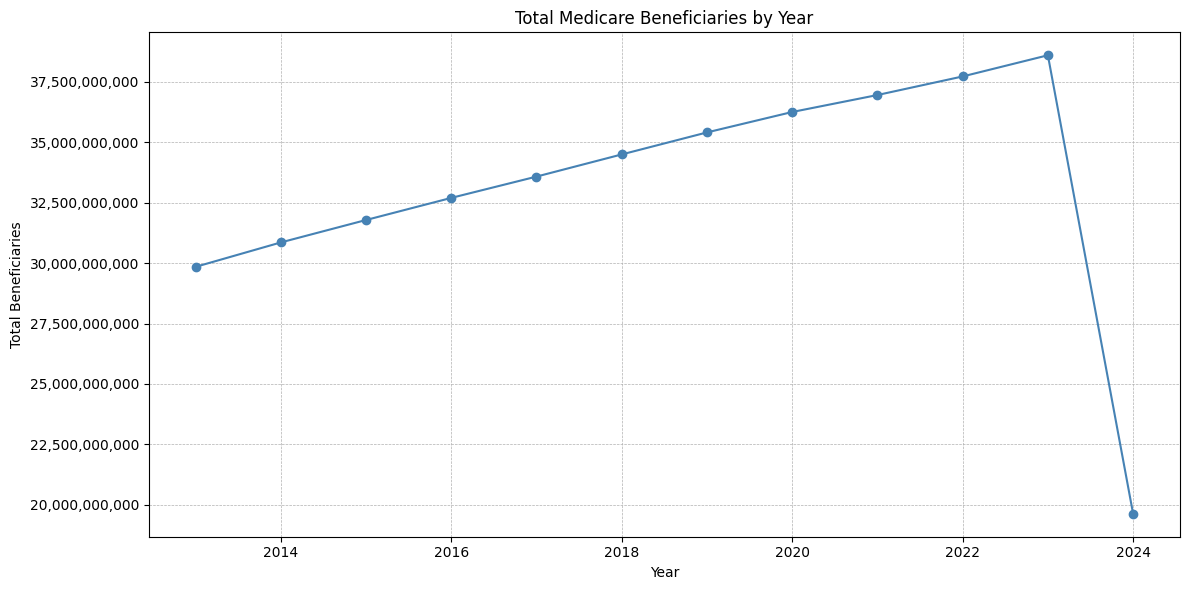

    YEAR  TOTAL_BENEFICIARIES
0   2013         2.984690e+10
1   2014         3.085745e+10
2   2015         3.178626e+10
3   2016         3.270161e+10
4   2017         3.358359e+10
5   2018         3.450099e+10
6   2019         3.541199e+10
7   2020         3.625742e+10
8   2021         3.696028e+10
9   2022         3.772930e+10
10  2023         3.860633e+10
11  2024         1.962493e+10


In [47]:
# filter out the MONTH == Year rows
filtered_insurance_df = insurance_df[insurance_df['MONTH'] != "Year"]

# Group by year and sum the total beneficiaries
yearly_totals = filtered_insurance_df.groupby('YEAR')['TOTAL_BENEFICIARIES'].sum().reset_index()

# Plot the time trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals['YEAR'], yearly_totals['TOTAL_BENEFICIARIES'], marker='o', linestyle='-', color='steelblue')
plt.title('Total Medicare Beneficiaries by Year')
plt.xlabel('Year')
plt.ylabel('Total Beneficiaries')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Format y-axis with comma separators
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

# Print the yearly totals
print(yearly_totals)